In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT LIBRARY**

In [2]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from termcolor import colored
from keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Import pustaka yang diperlukan
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz

import warnings
warnings.filterwarnings("ignore")

# **EDA DATA IMAGES**

In [3]:
folder_tvt_path = '/content/drive/MyDrive/Colab Notebooks/Praktikum_semester7/UAP/data-tvt'
full_path = '/content/drive/MyDrive/Colab Notebooks/Praktikum_semester7/UAP/data224x224'

train_path = os.path.join(folder_tvt_path, 'train')
val_path = os.path.join(folder_tvt_path, 'validation')
test_path = os.path.join(folder_tvt_path, 'test')

i. Plot Count Data

- Plot total file images

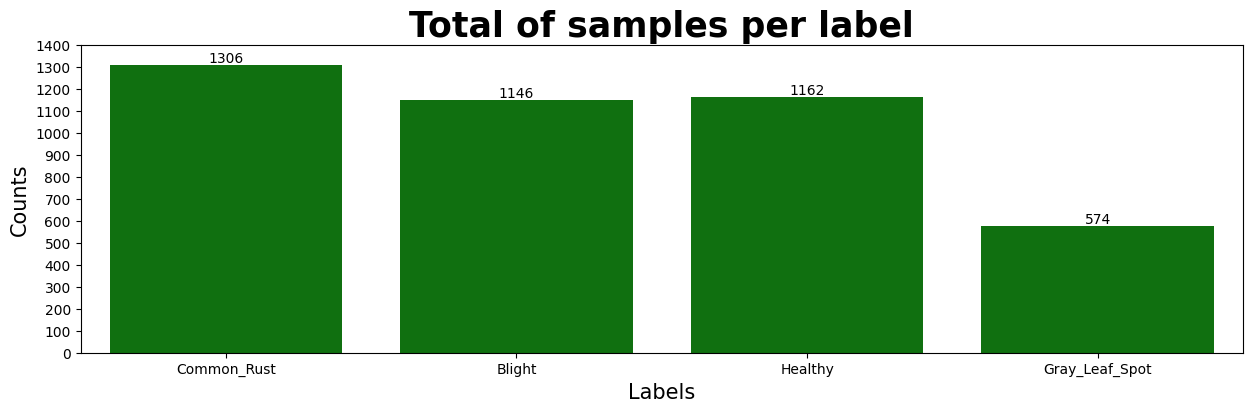

In [4]:
classes = [class_name for class_name in os.listdir(full_path)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(full_path, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='Green')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 1500, 100))
plt.show()

- Plot total train dir

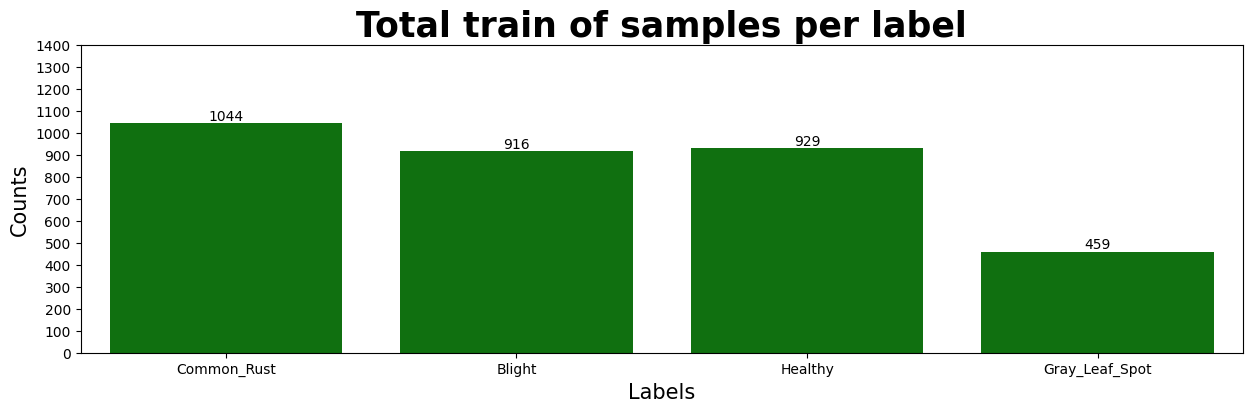

In [5]:
classes = [class_name for class_name in os.listdir(train_path)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(train_path, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='Green')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total train of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 1500, 100))
plt.show()

- Plot validation dir

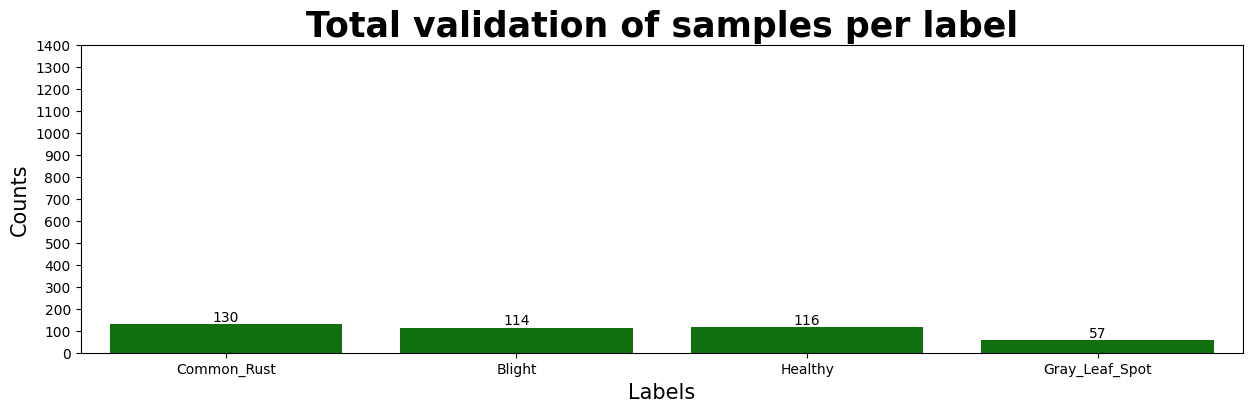

In [6]:
classes = [class_name for class_name in os.listdir(val_path)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(val_path, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='Green')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total validation of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 1500, 100))
plt.show()

- Plot test dir

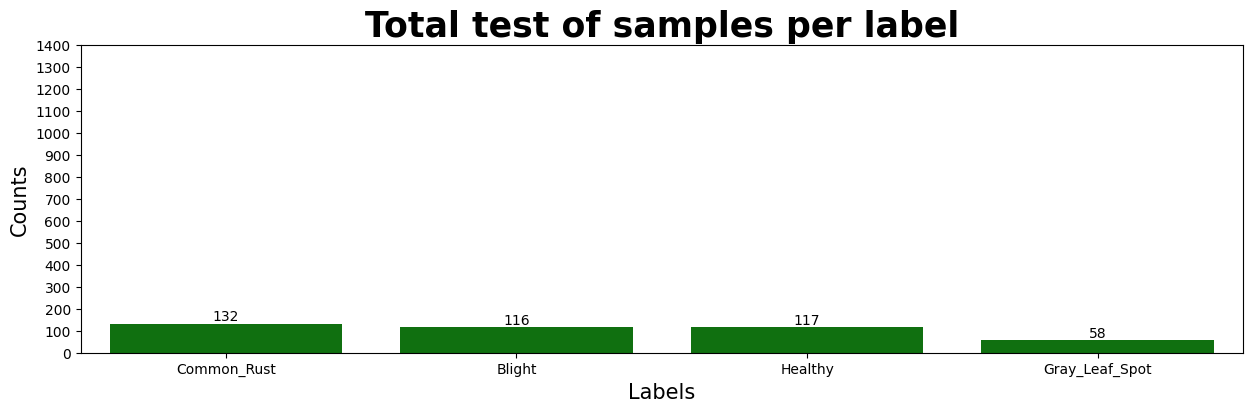

In [7]:
classes = [class_name for class_name in os.listdir(test_path)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(test_path, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='Green')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total test of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 1500, 100))
plt.show()

ii. check bad images

In [8]:
# def check_images(path):
#     for subdir, dirs, files in os.walk(path):
#         for file in files:
#             file_path = os.path.join(subdir, file)
#             try:
#                 img = Image.open(file_path) # buka iamge file
#                 img.verify() # memverifikasi image
#             except (IOError, SyntaxError) as e:
#                 print('Bad file:', file_path)

# check_images(train_path)
# check_images(val_path)
# check_images(test_path)

iii. Count class and files

In [9]:
def num_of_classes(folder_dir, folder_name) :
    classes = [class_name for class_name in os.listdir(train_path)]
    print(colored(f'number of classes in {folder_name} folder : {len(classes)}', 'blue', attrs=['bold']))

In [10]:
num_of_classes(train_path, 'train')
num_of_classes(val_path, 'validation')
num_of_classes(test_path, 'test')

number of classes in train folder : 4
number of classes in validation folder : 4
number of classes in test folder : 4


In [11]:
# A function to return DataFrame
def create_df(folder_path) :
    all_images = []
    for class_name in classes :
        class_path = os.path.join(folder_path, class_name)
        all_images.extend([(os.path.join(class_path, file_name), class_name) for file_name in os.listdir(class_path)])
    df = pd.DataFrame(all_images, columns=['file_path', 'label'])
    return df

In [12]:
train_df = create_df(train_path)
validation_df = create_df(val_path)
test_df = create_df(test_path)

print(colored(f'Total files : {len(train_df) + len(validation_df) + len(test_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples in train : {len(train_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples in validation : {len(validation_df)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples test : {len(test_df)}', 'blue', attrs=['bold']))

Total files : 4188
Number of samples in train : 3348
Number of samples in validation : 417
Number of samples test : 423


iv. visualisasi Data

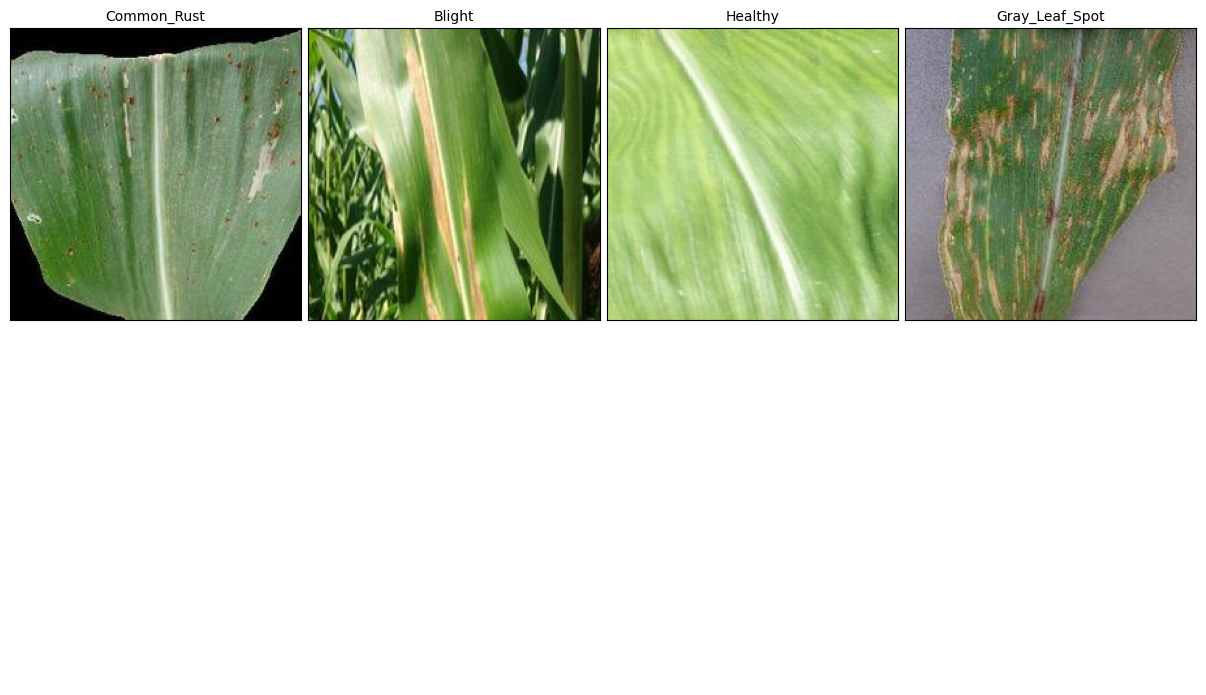

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df_unique = train_df.copy().drop_duplicates(subset=["label"]).reset_index()

# Number of unique labels
num_unique_labels = df_unique.shape[0]

# Calculate the number of rows and columns needed for subplots
nrows = (num_unique_labels // 4) + 1
ncols = min(num_unique_labels, 4)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, ax in enumerate(axes[:num_unique_labels]):
    ax.imshow(plt.imread(df_unique.file_path[i]))
    ax.set_title(df_unique.label[i], fontsize=10)

# Hide any remaining subplots if there are any
for ax in axes[num_unique_labels:]:
    ax.axis('off')

plt.tight_layout(pad=0.5)
plt.show()


# **PREPARE DATASET CATEGORICAL**

> Load the training dataset with generator and use augmentation

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
    color_mode='rgb'
)

Found 3348 images belonging to 4 classes.


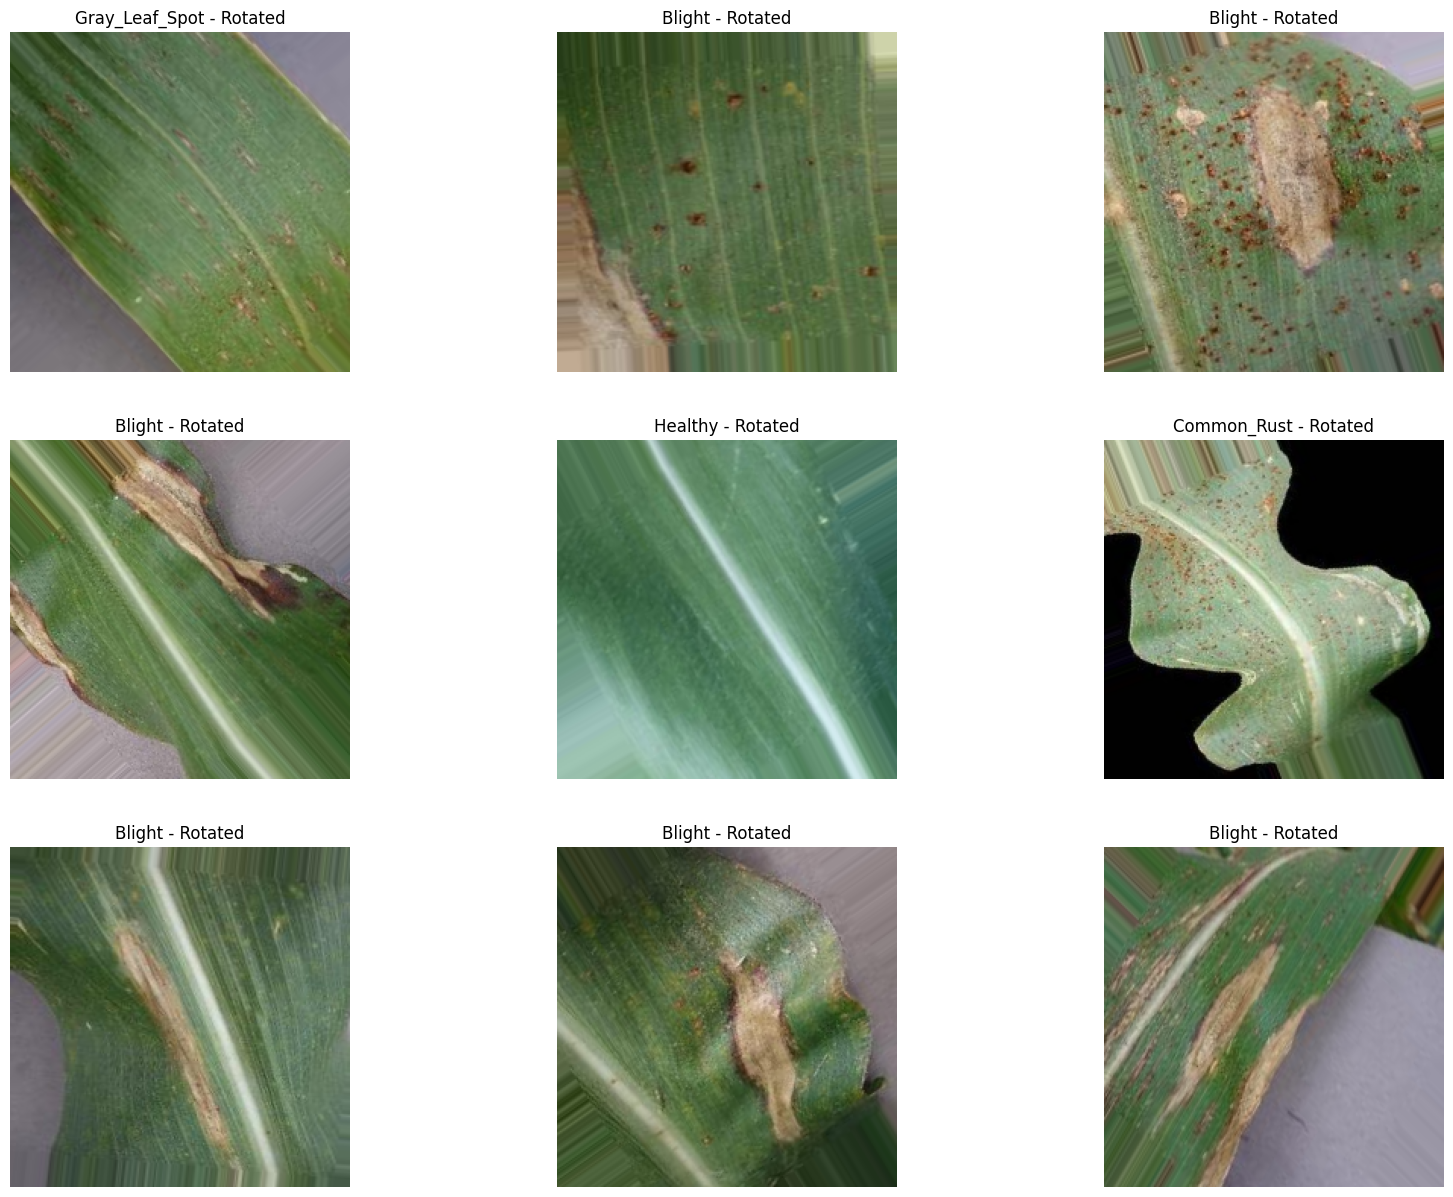

In [15]:
augmented_images, labels = next(train_generator)

# Tampilkan gambar augmentasi dengan label dan jenis augmentasi
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
class_names = list(train_generator.class_indices.keys())

for i in range(9):
    ax = axes[i//3, i%3]
    ax.imshow(augmented_images[i])
    aug_type = []
    if labels[i].any():
        aug_type.append("Flipped" if np.array_equal(augmented_images[i], np.flipud(augmented_images[i])) else "")
        aug_type.append("Rotated" if np.max(augmented_images[i]) != np.max(augmented_images[i-1]) else "")
        aug_type.append("Zoomed" if augmented_images[i].shape != augmented_images[i-1].shape else "")
        # aug_type.append("Brightness Adjusted")
    ax.set_title(f"{class_names[np.argmax(labels[i])]} - {', '.join([x for x in aug_type if x])}")
    ax.axis('off')



> Load the validation dataset with generator and use augmentation

In [16]:
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
    color_mode='rgb',
)

Found 417 images belonging to 4 classes.


In [17]:
test_datagen = ImageDataGenerator(1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    shuffle=False,
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

Found 423 images belonging to 4 classes.


In [18]:
x, y = next(train_generator)
print("Images shape:", x.shape)


Images shape: (32, 224, 224, 3)


In [19]:
labels = {value: key for key, value in train_generator.class_indices.items()}
class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Blight
1 : Common_Rust
2 : Gray_Leaf_Spot
3 : Healthy


# **BUILD CNN MODEL CATEGORICAL**

i. build model

In [20]:
model = tf.keras.Sequential([
    # input layer
    tf.keras.layers.Input(shape=(224, 224, 3)),

    # hidden layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    # fully connected
    tf.keras.layers.Dense(units=512, activation='relu'),

    # ouput layer
    tf.keras.layers.Dense(units=4, activation='softmax')
])

ii. model diagram

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 111, 111, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 55, 55, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,658,948 (10.14 MB)

 Trainable params: 2,658,948 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
!pip install pydot
!pip install graphviz

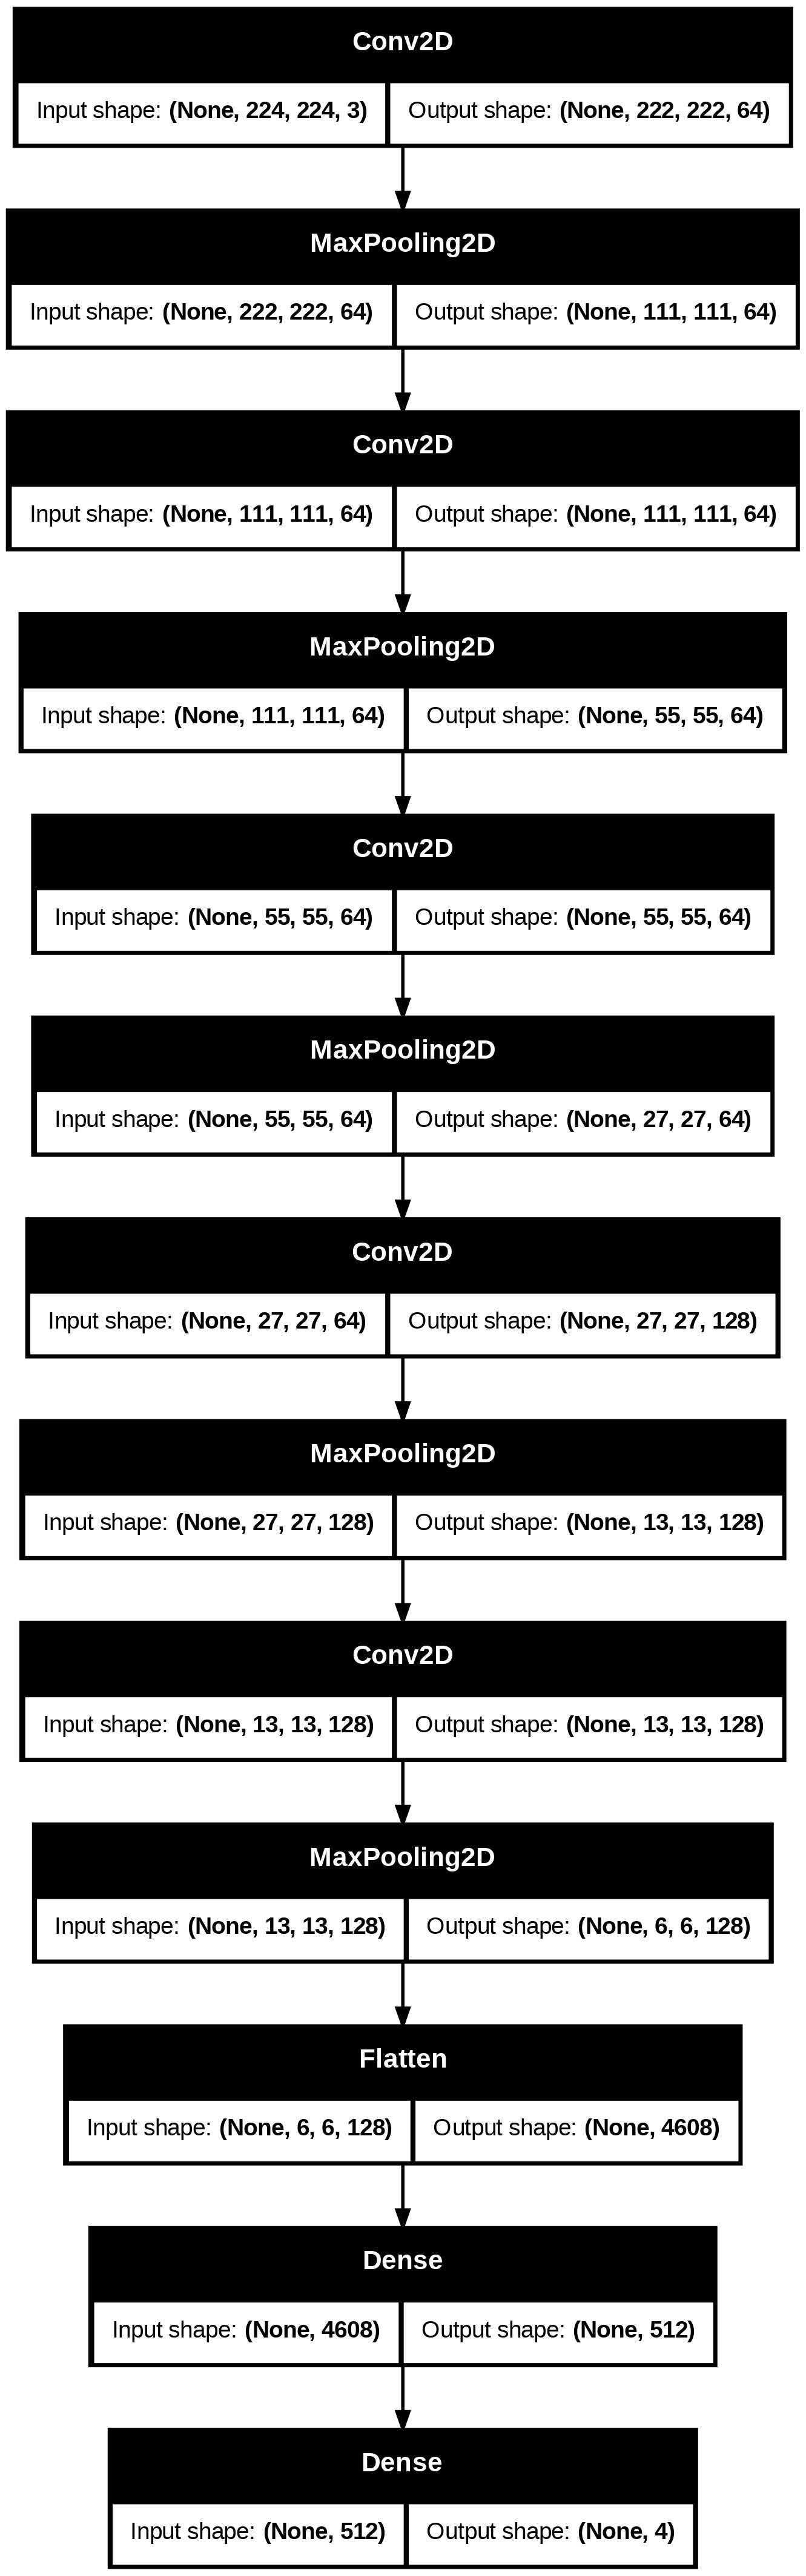

In [23]:
plot_model(model, show_shapes=True, show_layer_names=False, dpi=200)

iii. compile model

In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

iv. check point

In [25]:
# Model CheckPoint
checkpoint_cb = ModelCheckpoint(
    'my_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Early Stoping
earlystop_cb = EarlyStopping(
    patience=10,
    restore_best_weights=True,
    monitor='val_loss',
    mode='min'
)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=np.sqrt(0.1),
    patience=3,
    verbose=1,
    mode='min'
)

v. training model

batch adalah sekumpulan sampel yang digunakan untuk mengupdate parameter model dalam satu iterasi selama proses pelatihan.

In [26]:
history = model.fit(
    train_generator,
    epochs=250,
    batch_size=32,
    validation_data=val_generator,
    verbose=1,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr]
)

Epoch 1/250
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5238 - loss: 1.1263
Epoch 1: val_loss improved from inf to 0.57945, saving model to my_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 854s 8s/step - accuracy: 0.5250 - loss: 1.1238 - val_accuracy: 0.7650 - val_loss: 0.5794 - learning_rate: 1.0000e-04
Epoch 2/250
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.8016 - loss: 0.4728
Epoch 2: val_loss improved from 0.57945 to 0.41282, saving model to my_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 55s 496ms/step - accuracy: 0.8016 - loss: 0.4728 - val_accuracy: 0.8297 - val_loss: 0.4128 - learning_rate: 1.0000e-04
Epoch 3/250
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.8218 - loss: 0.4433
Epoch 3: val_loss improved from 0.41282 to 0.38831, saving model to my_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 80s 481ms/step - accuracy: 0.8219 - loss: 0.4430 - val_accuracy: 0.8082 - val_loss: 0.3883 - learning_rate: 1.0000e-04
Epoch 4/250
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms

# **PLOT RESULT DATA TRAINING**

In [27]:
result_data = pd.DataFrame(history.history)
result_data.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
37,0.920848,0.194210,0.923261,0.205095,9.999999e-07
38,0.927419,0.188919,0.923261,0.205309,3.162277e-07
39,0.926523,0.189600,0.923261,0.205463,3.162277e-07
40,0.928913,0.187460,0.923261,0.205670,3.162277e-07
41,0.924433,0.187654,0.920863,0.205497,9.999999e-08


In [28]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

lr = history.history['learning_rate']

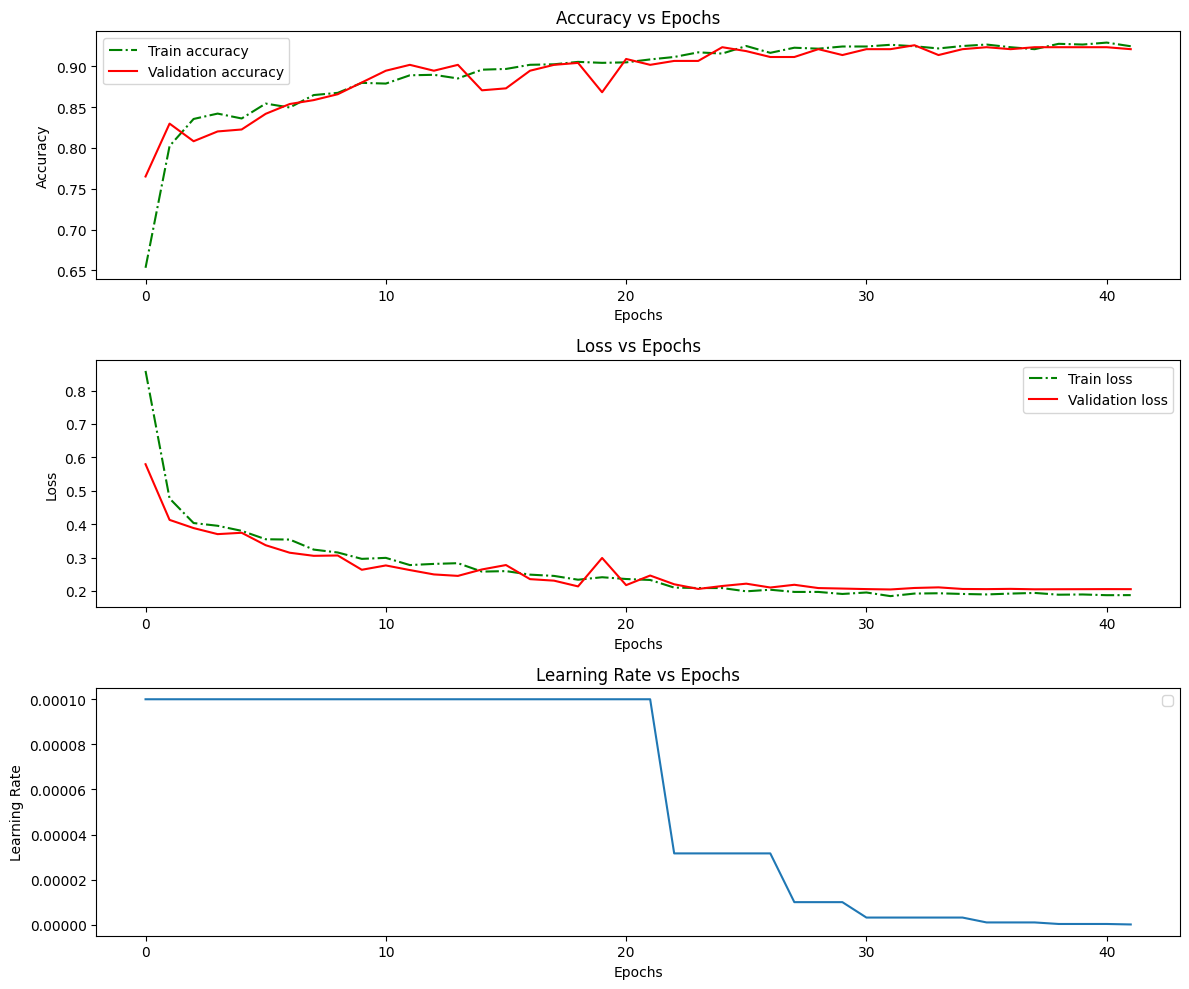

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Accuracy vs Epochs')
ax[0].plot(train_accuracy, '-.', label='Train accuracy', c='g')
ax[0].plot(val_accuracy, '-', label='Validation accuracy', c='r')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].set_title('Loss vs Epochs')
ax[1].plot(train_loss, '-.', label='Train loss', c='g')
ax[1].plot(val_loss, '-', label='Validation loss', c='r')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

ax[2].set_title('Learning Rate vs Epochs')
ax[2].plot(lr, '-')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Learning Rate')
ax[2].legend()

plt.tight_layout()
plt.show()

# **TEST MODEL**

In [30]:
prediction = model.predict(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 102s 8s/step


In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
idx = 0

for i in range(2):
    for j in range(5):
        prediction_class = class_map[np.argmax(prediction[idx])]
        ax[i, j].set_title(f"{prediction_class}")
        ax[i, j].imshow(test_generator[0][0][idx])
        idx += 1

plt.suptitle('Prediction Testing', fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=32)

In [ ]:
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy} -> {100*test_accuracy:.2f}%")

# **PLOT TEST MODEL**

i. define y_hat and y

In [ ]:
y_hat = np.argmax(prediction, axis=1)
y_true = test_generator.classes

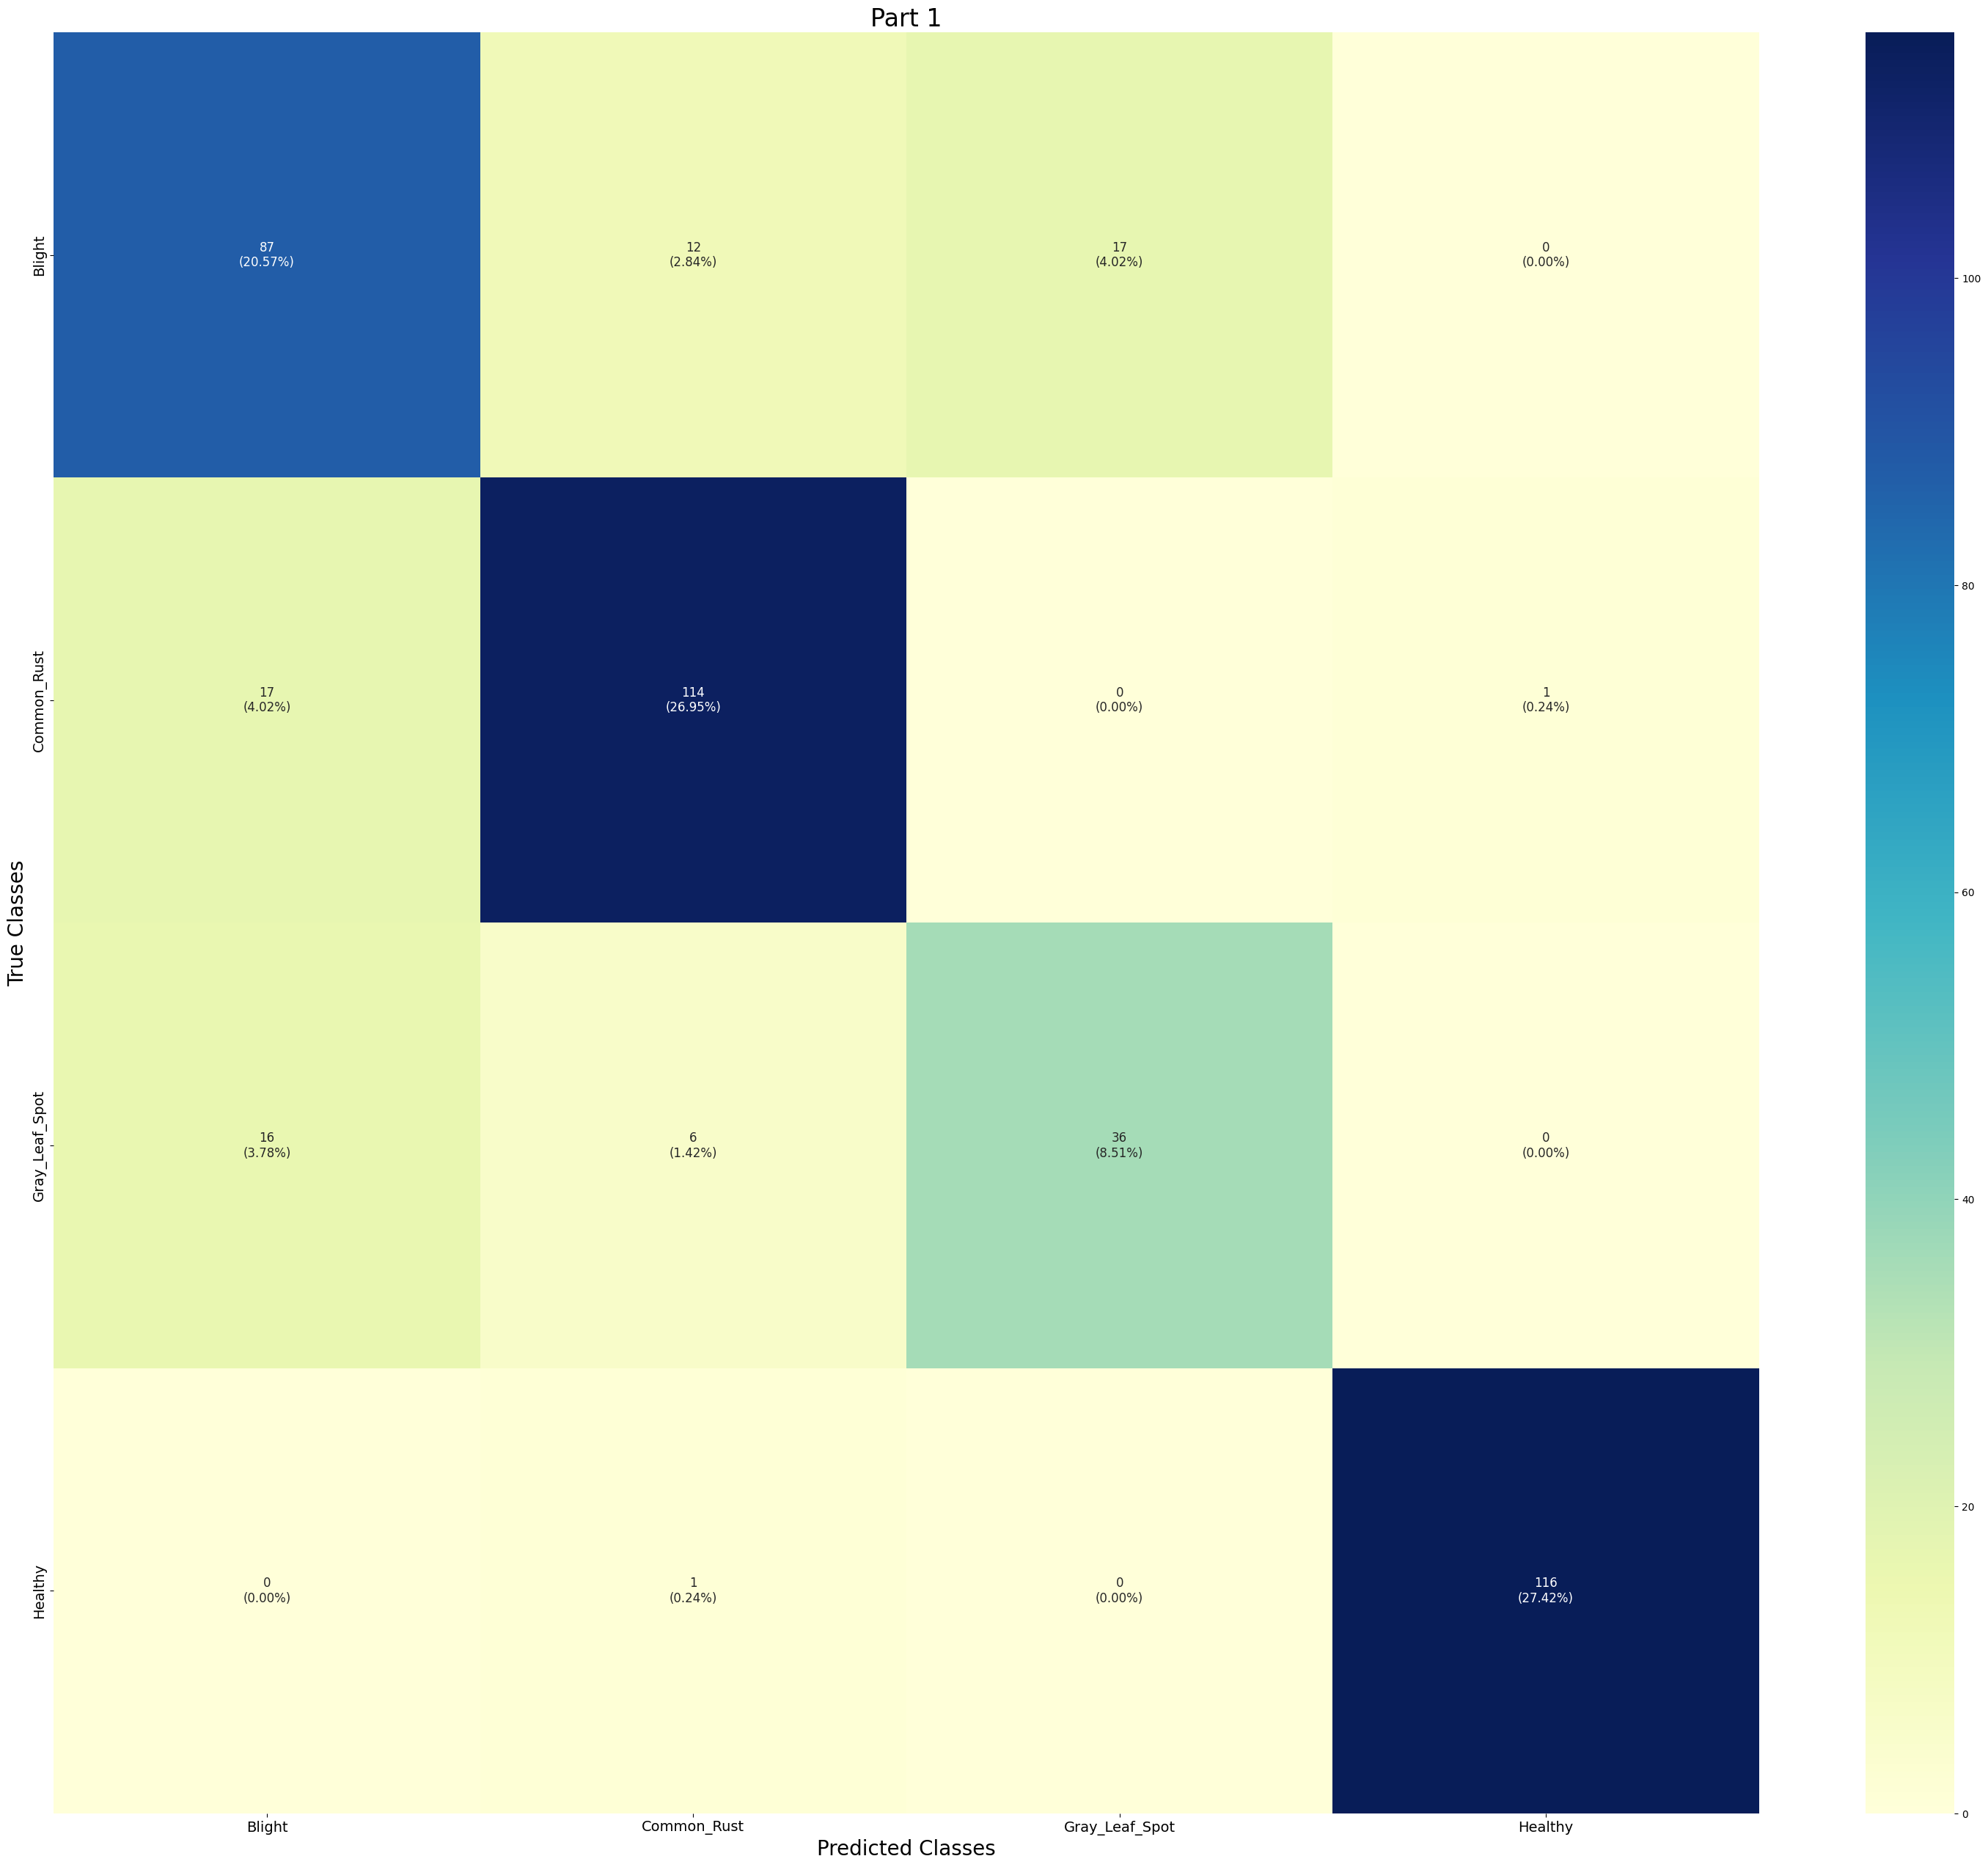

In [35]:
# Hitung confusion matrix
cf_mtx = confusion_matrix(y_true, y_hat)

# Pisahkan menjadi dua bagian
num_classes = 58
mid_point = num_classes // 2

cf_mtx_part1 = cf_mtx[:mid_point, :mid_point]
cf_mtx_part2 = cf_mtx[mid_point:, mid_point:]

class_map_values = list(class_map.values())
class_labels_part1 = class_map_values[:mid_point]
class_labels_part2 = class_map_values[mid_point:]

def prepare_box_class(cf_mtx):
    group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
    box_class = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
    return np.asarray(box_class).reshape(cf_mtx.shape)

box_class_part1 = prepare_box_class(cf_mtx_part1)
box_class_part2 = prepare_box_class(cf_mtx_part2)

plt.figure(figsize=(30, 50))  # Ukuran gambar yang besar untuk dua baris

# Heatmap untuk bagian pertama
plt.subplot(2, 1, 1)
sns.heatmap(cf_mtx_part1, xticklabels=class_labels_part1, yticklabels=class_labels_part1, cmap="YlGnBu", fmt="", annot=box_class_part1, annot_kws={"size": 12})
plt.xlabel('Predicted Classes', fontsize=20)
plt.ylabel('True Classes', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Part 1', fontsize=24)



plt.tight_layout()
plt.show()

In [36]:
print(classification_report(y_true, y_hat, target_names=class_map.values()))

                precision    recall  f1-score   support

        Blight       0.72      0.75      0.74       116
   Common_Rust       0.86      0.86      0.86       132
Gray_Leaf_Spot       0.68      0.62      0.65        58
       Healthy       0.99      0.99      0.99       117

      accuracy                           0.83       423
     macro avg       0.81      0.81      0.81       423
  weighted avg       0.83      0.83      0.83       423



# **WRONG PREDICTION**

In [37]:
y_true = np.array(y_true)
print(y_true.shape)

(423,)


In [38]:
errors = (y_true - y_hat != 0)
error_indices = np.where(errors)[0]
y_true_errors = y_true[errors]
# print(f'error: {errors}\n')
# print(y_true_errors)
# print(y_true_errors[0])
# print(class_map[y_true_errors[idx]])

y_hat_errors = y_hat[errors]
# print(y_hat_errors)
# print(y_hat_errors[0])
# print(class_map[y_hat_errors[idx]])

In [39]:
# Menghitung jumlah total prediksi
total_predictions = y_true.shape[0]

# Menghitung jumlah prediksi yang salah
total_errors = y_true_errors.shape[0]

# Menghitung persentase prediksi yang salah
error_percentage = (total_errors / total_predictions) * 100

print(f"Jumlah total prediksi: {total_predictions}")
print(f"Jumlah prediksi yang salah: {total_errors}")
print(f"Persentase prediksi yang salah: {error_percentage}%")

Jumlah total prediksi: 423
Jumlah prediksi yang salah: 70
Persentase prediksi yang salah: 16.548463356973993%


In [40]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors] # mengambil images yang error

In [41]:
fig, ax = plt.subplots(nrows=total_errors, ncols=1, figsize=(90, 150))

for idx, error in enumerate(y_true_errors):
    true_label = labels[error]
    predicted_label = labels[y_hat_errors[idx]]
    ax[idx].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
    img_path = os.path.join(test_path, test_img[idx])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[idx].imshow(img)
    ax[idx].axis("off")

plt.tight_layout()
# plt.suptitle('All Wrong Predictions made on test set', fontsize=20)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 15))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_class = class_map[true_index]

        predicted_index = y_hat_errors[idx]
        predicted_class = class_map[predicted_index]

        ax[i, j].set_title(f"True Label: {true_class} \n Predicted Label: {predicted_class}")
        img_path = os.path.join(test_path, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
model.save("/content/drive/MyDrive/Colab Notebooks/Praktikum_semester7/UAP/model_CNN.h5")